In [20]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
cd /content/gdrive/My Drive/chung_proj

/content/gdrive/My Drive/chung_proj


In [24]:
move = pd.read_excel('유동인구 데이터.xlsx')
move.head(10)

,Unnamed: 0,옥도면,월명동,경암동
0,남성,41994.81,2820.04,22083.00
1,여성,23025.94,2457.66,17130.63
2,10대,1851.30,544.95,2488.51
3,20대,3900.97,441.74,3835.92
4,30대,9558.53,882.71,7950.13
5,40대,15551.70,1054.24,8673.65
6,50대,18273.87,1115.11,8120.75
7,60대,15884.39,1238.95,8144.67


In [25]:
move_연령 = move.drop([move.index[0],move.index[1]])
move_연령

,Unnamed: 0,옥도면,월명동,경암동
2,10대,1851.30,544.95,2488.51
3,20대,3900.97,441.74,3835.92
4,30대,9558.53,882.71,7950.13
5,40대,15551.70,1054.24,8673.65
6,50대,18273.87,1115.11,8120.75
7,60대,15884.39,1238.95,8144.67


In [26]:
move_연령['옥도면'] = move_연령['옥도면'].apply(pd.to_numeric)
move_연령['월명동'] = move_연령['월명동'].apply(pd.to_numeric)
move_연령['경암동'] = move_연령['경암동'].apply(pd.to_numeric)

In [27]:
move_연령.rename(columns = {'Unnamed: 0':'연령층'}, inplace = True)

In [28]:
move_연령

,연령층,옥도면,월명동,경암동
2,10대,1851.30,544.95,2488.51
3,20대,3900.97,441.74,3835.92
4,30대,9558.53,882.71,7950.13
5,40대,15551.70,1054.24,8673.65
6,50대,18273.87,1115.11,8120.75
7,60대,15884.39,1238.95,8144.67


In [29]:
move_성별 = move.drop([move.index[2],move.index[3],move.index[4],move.index[5],move.index[6],move.index[7]])
move_성별

,Unnamed: 0,옥도면,월명동,경암동
0,남성,41994.81,2820.04,22083.00
1,여성,23025.94,2457.66,17130.63


In [30]:
move_성별.rename(columns = {'Unnamed: 0':'성별'}, inplace = True)

In [31]:
move_성별['옥도면'] = move_성별['옥도면'].apply(pd.to_numeric)
move_성별['월명동'] = move_성별['월명동'].apply(pd.to_numeric)
move_성별['경암동'] = move_성별['경암동'].apply(pd.to_numeric)

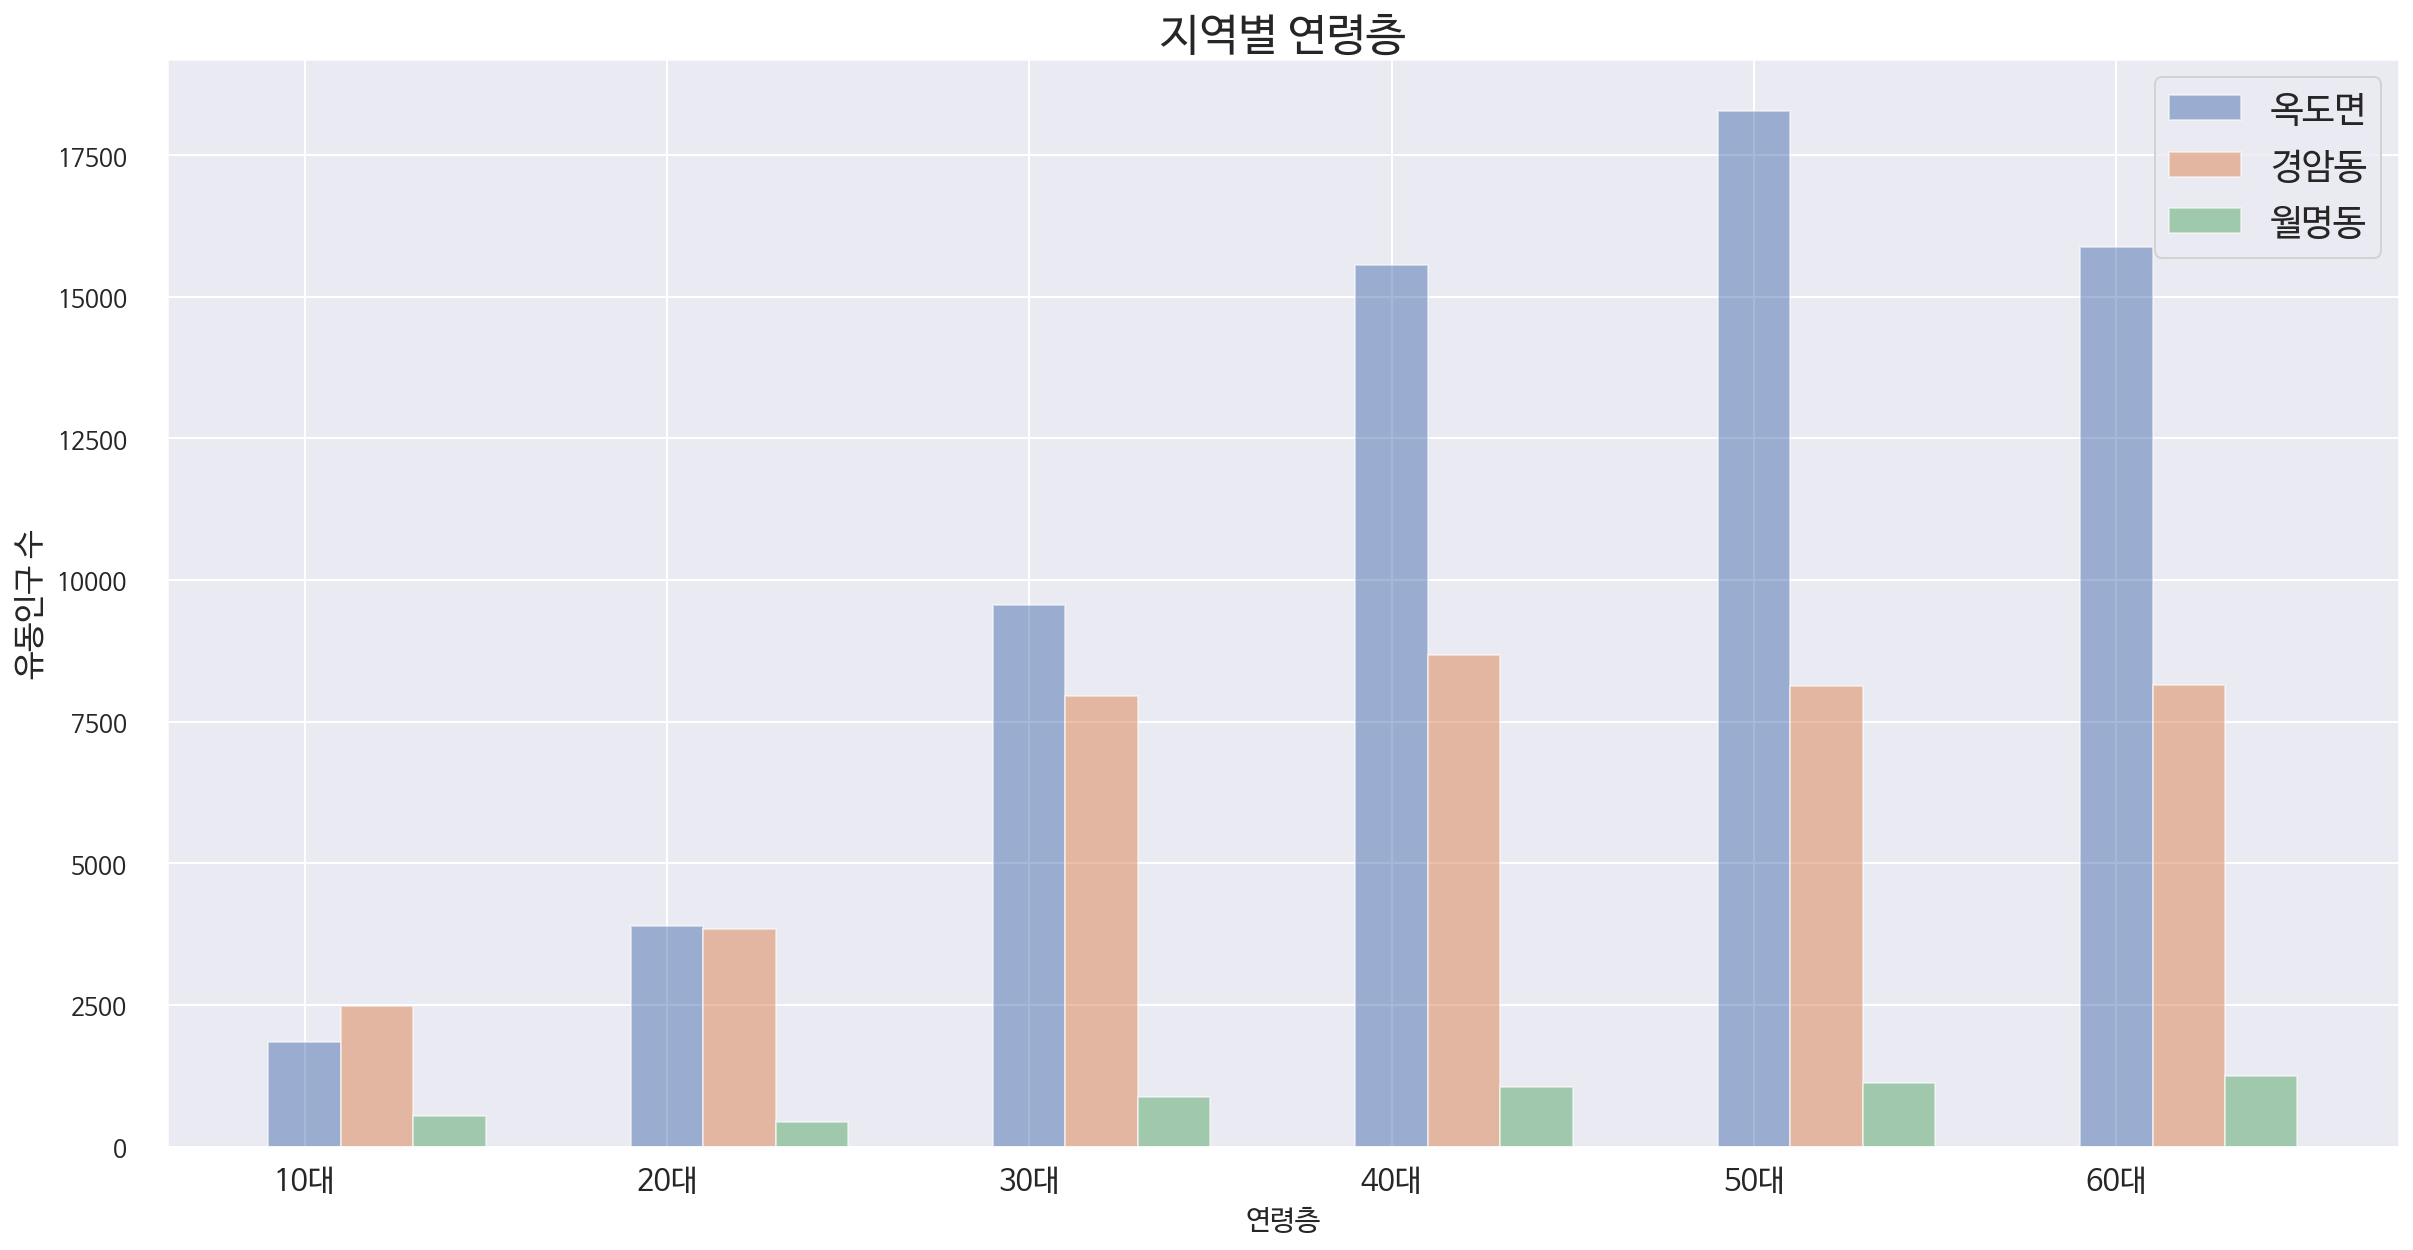

In [16]:
sns.set(rc = {'figure.figsize':(20,10)})
plt.rc('font', family='NanumBarunGothic') 

bar_width =0.2
alpha = 0.5
label = move_연령['연령층']
N = len(move_연령.index.unique())
index = np.arange(N)

p1 = plt.bar( index, move_연령['옥도면'],bar_width, alpha = alpha)
p2 = plt.bar( index +bar_width,move_연령['경암동'],bar_width,alpha = alpha)
p3 = plt.bar(index+bar_width+bar_width, move_연령['월명동'],bar_width,alpha = alpha)

plt.title('지역별 연령층', fontsize=22)
plt.xticks(index, label, fontsize=15)
plt.xlabel('연령층',fontsize=14)
plt.ylabel('유동인구 수',fontsize=16)
plt.legend((p1[0],p2[0],p3[0]), ('옥도면','경암동', '월명동'), fontsize=18)
plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=12, width=4, color='r')

In [32]:
move_성별

,성별,옥도면,월명동,경암동
0,남성,41994.81,2820.04,22083.00
1,여성,23025.94,2457.66,17130.63


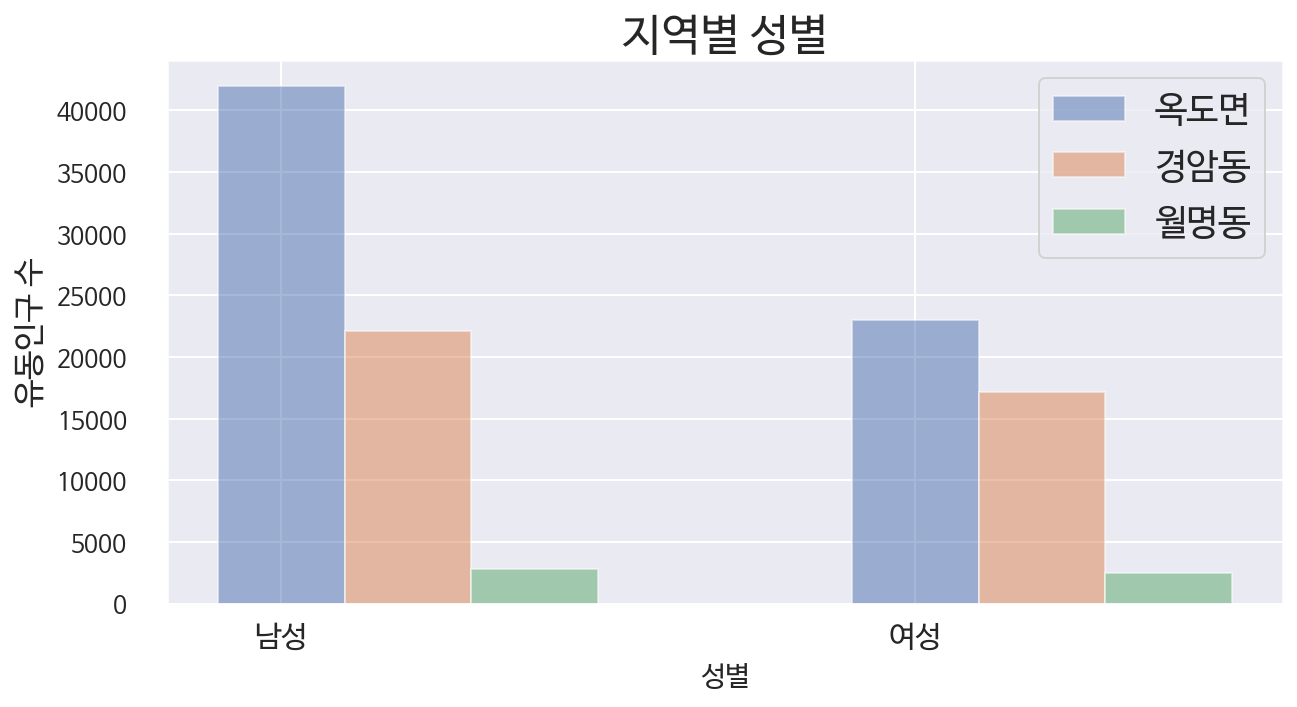

In [34]:
sns.set(rc = {'figure.figsize':(10,5)})
plt.rc('font', family='NanumBarunGothic') 

bar_width =0.2
alpha = 0.5
label = move_성별['성별']
N = len(move_성별.index.unique())
index = np.arange(N)

p1 = plt.bar( index, move_성별['옥도면'],bar_width, alpha = alpha)
p2 = plt.bar( index +bar_width,move_성별['경암동'],bar_width,alpha = alpha)
p3 = plt.bar(index+bar_width+bar_width, move_성별['월명동'],bar_width,alpha = alpha)

plt.title('지역별 성별', fontsize=22)
plt.xticks(index, label, fontsize=15)
plt.xlabel('성별',fontsize=14)
plt.ylabel('유동인구 수',fontsize=16)
plt.legend((p1[0],p2[0],p3[0]), ('옥도면','경암동', '월명동'), fontsize=18)
plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=12, width=4, color='r')